In [33]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [34]:
(x_train, _),(_,_)=tf.keras.datasets.mnist.load_data()
x_train=x_train/255.0
x_train = np.expand_dims(x_train,axis=-1)

In [39]:
def build_generator():
  model = tf.keras.Sequential()
  model.add(layers.Dense(128,input_dim=100))
  model.add(layers.LeakyReLU(alpha=0.2))
  model.add(layers.Dense(784,activation='tanh'))
  model.add(layers.Reshape((28,28,1)))
  return model

In [43]:
def build_discriminator():
  model = tf.keras.Sequential()
  model.add(layers.Flatten(input_shape=(28,28,1)))
  model.add(layers.Dense(128))
  model.add(layers.LeakyReLU(alpha=0.2))
  model.add(layers.Dense(1,activation='sigmoid'))
  return model

In [44]:
discriminator = build_discriminator()


In [45]:
discriminator.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
generator = build_generator()
discriminator.trainable = False
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = tf.keras.Model(gan_input,gan_output)
gan.compile(optimizer='adam',loss='binary_crossentropy')

In [48]:
def train_gan(epochs,batch_size):
  for epoch in range(epochs):
    # Train the Discriminator

    noise = np.random.normal(0,1,(batch_size,100))
    generated_images = generator.predict(noise)

    real_images = x_train[np.random.randint(0,x_train.shape[0],batch_size)]

    labels_real = np.ones((batch_size,1))
    labels_fake = np.zeros((batch_size,1))

    d_loss_real = discriminator.train_on_batch(real_images,labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_images,labels_fake)

    # Train the generator

    noise = np.random.normal(0,1,(batch_size,100))
    labels = np.ones((batch_size,1))
    g_loss = gan.train_on_batch(noise,labels)

    # Print

    print(f"Epoch {epoch + 1}/{epochs} [D loss: {d_loss_real[0]:.4f},acc.:{d_loss_real[1] * 100:.2f}% [G loss:{g_loss:.4f}]]")



In [52]:
train_gan(epochs=1000,batch_size=32)

1/1 [==============================] - 0s 108ms/step
Epoch 1/1000 [D loss: 0.0421,acc.:100.00% [G loss:3.1794]]
1/1 [==============================] - 0s 76ms/step
Epoch 2/1000 [D loss: 0.0810,acc.:100.00% [G loss:3.1810]]
1/1 [==============================] - 0s 47ms/step
Epoch 3/1000 [D loss: 0.0685,acc.:100.00% [G loss:2.7938]]
1/1 [==============================] - 0s 113ms/step
Epoch 4/1000 [D loss: 0.0672,acc.:100.00% [G loss:3.3860]]
1/1 [==============================] - 0s 177ms/step
Epoch 5/1000 [D loss: 0.1003,acc.:100.00% [G loss:3.5626]]
1/1 [==============================] - 0s 49ms/step
Epoch 6/1000 [D loss: 0.0982,acc.:100.00% [G loss:3.5819]]
1/1 [==============================] - 0s 49ms/step
Epoch 7/1000 [D loss: 0.1000,acc.:100.00% [G loss:3.4185]]
1/1 [==============================] - 0s 33ms/step
Epoch 8/1000 [D loss: 0.1106,acc.:100.00% [G loss:3.4530]]
1/1 [==============================] - 0s 32ms/step
Epoch 9/1000 [D loss: 0.0967,acc.:100.00% [G loss:3.6996]

In [50]:
def plot_generated_images(generator,epoch,examples=10,dim=(1,10),figsize=(10,1)):
  noise = np.random.normal(0,1,(examples,100))
  generated_images = generator.predict(noise)
  generated_images = generated_images.reshape(examples,28,28)

  plt.figure(figsize=figsize)
  for i in range(examples):
    plt.subplot(dim[0],dim[1],i+1)
    plt.imshow(generated_images[i],cmap='gray')
    plt.axis('off')
  plt.tight_layout()
  plt.show()

1/1 [==============================] - 0s 22ms/step


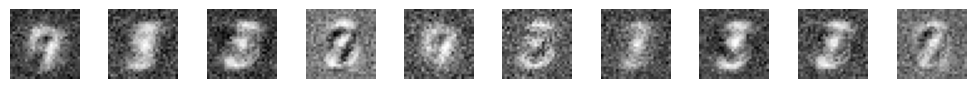

In [53]:
plot_generated_images(generator,epoch=1000)